# Ejercicio 2 — Grafos: Propagación de información y autoridad de URLs

## Objetivo

Modelar la circulación de información en la Web de Stanford mediante un grafo dirigido y estimar la autoridad / influencia de las URLs usando métricas de grafos (PageRank, grados, HITS).

Esta selección no es una muestra aleatoria de toda la web de Stanford, pero es suficiente para ilustrar los conceptos de propagación de autoridad y PageRank.

## Datos y preprocesamiento

- Data set: Stanford WebGraph
-  Cafila representa una arista dirigida
- Para no trabajar con el dataset completo se limita a 50_000 aristas y se contrstruye un subgrafo base limitado a 50k aristas

In [3]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import HTML, display

# Importar módulo personalizado
from ej2_grafos import StanfordWebGraph
# Configuración
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")



In [4]:
# lectura de datos
DATA_PATH = '../data/web-Stanford.txt'
stanford = StanfordWebGraph(data_path=DATA_PATH)


In [5]:
graph = stanford.load_graph(max_edges=50_000)
stanford.describe_graph(graph)

df_pr = stanford.compute_metrics()
top20 = df_pr.head(20)
print(top20)

Leyendo aristas: 0it [00:00, ?it/s]

Leyendo aristas: 50003it [00:00, 527429.98it/s]



Grafo cargado:
  - Nodos: 16674
  - Aristas: 50000

Resumen del grafo:
  - Nodos: 16674
  - Aristas: 50000
  - Grado medio: 6.00
  - Grado máximo: 770

Calculando métricas (PageRank, grados, HITS)...

Top-5 nodos por PageRank:
     node  pagerank  in_degree  out_degree  hits_authority
0  226411  0.004060        750          20    6.675413e-06
1       2  0.002069         31          31    9.690925e-20
2  234704  0.001945        421          23    5.684436e-04
3  225872  0.001896        117         189    1.158001e-06
4  186750  0.001877        114          21    1.099171e-06
      node  pagerank  in_degree  out_degree  hits_authority
0   226411  0.004060        750          20    6.675413e-06
1        2  0.002069         31          31    9.690925e-20
2   234704  0.001945        421          23    5.684436e-04
3   225872  0.001896        117         189    1.158001e-06
4   186750  0.001877        114          21    1.099171e-06
5   241454  0.001786        117          64    7.900675e-1

Para reducir los tiemos de ejecución, se trabajo con el subgrafo de N aristas (50.000). Este subgrasfo se contruyo usando las primeras N aristas del archivo web-Stanford.txt

*No es una muestra laeatoria de toda los datos, pero se puede usar para pruebas y entender los conceptos de la prueba*

EL top 20 correpsonde a las URLs con mayor autoridad en el subgrafo de 50mil aristas.

Se observa que los nodos con mayor PageRank suelen ser paginas enlazadas (alto in-degree) y con pocos enlaces salientes (bajo out-degree).

## Induccion del subgrafo con los Top-N y sus vecinos de primer nivel

Para explicar mejor el comportamiento de los nodos más influyentes, se construye un subgrafo compacto alrededor del Top-N por PageRank

Se toma el Top-10 por page rank (para mejor vualización) y para cada uno se añaden hasta 10 vecinos de primer nivel (entrantes y salientes). Con el fin de obtener un subgrafo compacto, donde los nodos rojos representa el Top-N y los azules los vecinos más relevantes,


Subgrafo explicativo compacto:
  - Top-N nodos: 10
  - Nodos totales en subgrafo: 78
  - Aristas totales en subgrafo: 387


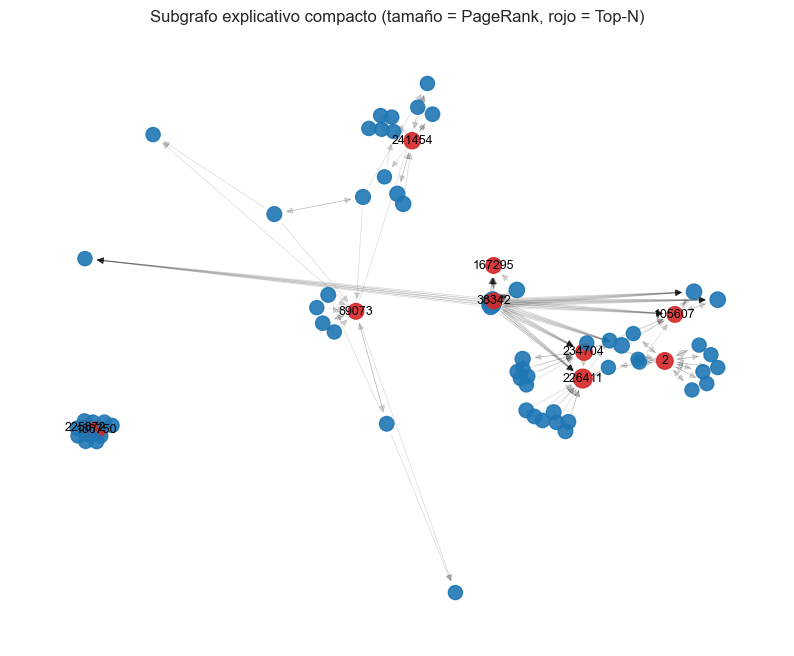

In [6]:
G_exp = stanford.build_explanatory_subgraph(df_pr, top_n=10,  max_neighbors_per_top_node= 10)

stanford.plot_explanatory_subgraph(G_exp, df_pr, 10)


In [7]:
top20_nodes = df_pr.head(10)["node"].tolist()

stanford.visualize_subgraph_interactive(
    ego_graph=G_exp,
    top_nodes=top20_nodes,
    save_path="../visualizations/subgrafo_explicativo_interactivo.html",
)


Visualizacion interactiva guardada en: ../visualizations/subgrafo_explicativo_interactivo.html


'../visualizations/subgrafo_explicativo_interactivo.html'

In [8]:
stanford.analyze_top_nodes(df_pr, top_n=20)


Top-20 nodos por PageRank:
      node  pagerank  in_degree  out_degree
0   226411  0.004060        750          20
1        2  0.002069         31          31
2   234704  0.001945        421          23
3   225872  0.001896        117         189
4   186750  0.001877        114          21
5   241454  0.001786        117          64
6    89073  0.001345         64          64
7   105607  0.001307        310          35
8   167295  0.001298        310          12
9    38342  0.001234        304          27
10  214128  0.001083        304          16
11  198090  0.001083        304          19
12   81435  0.001083        304          16
13   34573  0.001051        303           7
14  245659  0.001010        302          21
15   67756  0.000910         83           2
16  132695  0.000861         99          28
17   69358  0.000831         83           7
18   89156  0.000717          4           0
19     224  0.000699         15          22

Estadísticas de los Top-N:
  - PageRank medio: 

,node,pagerank,in_degree,out_degree,hits_authority
0,226411,0.004060,750,20,6.675413e-06
1,2,0.002069,31,31,9.690925e-20
2,234704,0.001945,421,23,5.684436e-04
3,225872,0.001896,117,189,1.158001e-06
4,186750,0.001877,114,21,1.099171e-06
5,241454,0.001786,117,64,7.900675e-14
6,89073,0.001345,64,64,4.376190e-12
7,105607,0.001307,310,35,7.641969e-04
8,167295,0.001298,310,12,2.514237e-04
9,38342,0.001234,304,27,2.466237e-03


El nodo 226411 tiene un degree de 750 y el PageRank más alto del subgrafo. Otros nodos como 234704, 167295 y 105607 tienen in-degree altos > 300, lo cual indica que son URLs que reciben muchas enlaces desde muchas otras URLS; tal vez sean paginas de indice o secciones principales.

El nodo 2 muestra que importante de donde llegan los enlaces con 31 enlaces entrantes y salientes, tiene un page rank alto, lo que indica que es una URL importante.
